<a href="https://colab.research.google.com/github/ritikaiitrpr/COVID19-DETECTION-USING-ML-MODELS/blob/main/BTP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from keras.preprocessing import image
from keras.models import Sequential
import keras
from keras.preprocessing import image
import numpy as np
import pandas as pd
import glob
import os
import cv2
import matplotlib.pyplot as plt


DATA PREPROCESSING

In [ ]:
class_names = ['Normal','Covid']
IMG_SIZE = 125
def get_data_from_folder(path):
  data = []
  for class_name in class_names: # iterate through classes
    try:
      files = glob.glob('/content/drive/MyDrive/archive/CN-modified'+"/"+class_name+"/*") # get files in each folder(class)
      for f in files:
        img = cv2.imread(f) #read the image
        img = cv2.resize(img,(IMG_SIZE,IMG_SIZE)) #resize the image
        cv2.imshow(img)
        data.append([np.array(img),class_names.index(class_name)]) #Append images and corresponding labels to data
    except:
      pass
  np.random.shuffle(data)
  return data

In [ ]:
# creating the image data generator to standardize images
datagen = image.ImageDataGenerator(featurewise_center =True,
      featurewise_std_normalization = True)
datagen = image.ImageDataGenerator(rescale=1/125,horizontal_flip=True,zoom_range=0.2,rotation_range=20,shear_range =0.2)
data = datagen.flow_from_directory(directory= '/content/drive/MyDrive/archive/CN-modified', target_size=(256,256),batch_size=16, class_mode='binary')

Found 3488 images belonging to 2 classes.


In [ ]:
data.class_indices

{'Covid': 0, 'Normal': 1}

EXTRACTING FEATURES USING GLCM AND SAVING INTO CSV


In [ ]:
import os
data_dir=os.path.expanduser('/content/drive/MyDrive/archive/CN-modified')

In [ ]:

files=[]
labels=[]
for r,d,f in os.walk(data_dir):
  for file in f:
    #if  in file:
      label=r.split('\\')[-1]
      labels.append(label)
      files.append(os.path.join(r,file))
for f in files:
  print(f)

/content/drive/MyDrive/archive/CN-modified/Normal/NORMAL(811).jpg
/content/drive/MyDrive/archive/CN-modified/Normal/NORMAL(782).jpg
/content/drive/MyDrive/archive/CN-modified/Normal/NORMAL(772).jpg
/content/drive/MyDrive/archive/CN-modified/Normal/NORMAL(804).jpg
/content/drive/MyDrive/archive/CN-modified/Normal/NORMAL(780).jpg
/content/drive/MyDrive/archive/CN-modified/Normal/NORMAL(786).jpg
/content/drive/MyDrive/archive/CN-modified/Normal/NORMAL(848).jpg
/content/drive/MyDrive/archive/CN-modified/Normal/NORMAL(823).jpg
/content/drive/MyDrive/archive/CN-modified/Normal/NORMAL(838).jpg
/content/drive/MyDrive/archive/CN-modified/Normal/NORMAL(854).jpg
/content/drive/MyDrive/archive/CN-modified/Normal/NORMAL(843).jpg
/content/drive/MyDrive/archive/CN-modified/Normal/NORMAL(818).jpg
/content/drive/MyDrive/archive/CN-modified/Normal/NORMAL(847).jpg
/content/drive/MyDrive/archive/CN-modified/Normal/NORMAL(831).jpg
/content/drive/MyDrive/archive/CN-modified/Normal/NORMAL(860).jpg
/content/d

In [ ]:

import numpy as np
import pywt
import cv2
from skimage.feature import greycomatrix , greycoprops
import csv
with open('new_features.csv',"a+",newline="") as wr:
  writer=csv.writer(wr)
  i=0
  for f in files:
    img=cv2.imread(f)
    coeffs2=pywt.dwt2(img,'db2')
    LL,(LH,HL,HH) = coeffs2
    g=[]
    con=[]
    enr=[]
    dis=[]
    hom=[]
    g.append(greycomatrix(np.uint8(LL[:,:,0]),[1],[0],levels=256,normed=True,symmetric=True))
    g.append(greycomatrix(np.uint8(LL[:,:,1]),[1],[0],levels=256,normed=True,symmetric=True))
    g.append(greycomatrix(np.uint8(LL[:,:,2]),[1],[0],levels=256,normed=True,symmetric=True))
    g.append(greycomatrix(np.uint8(LH[:,:,0]),[1],[0],levels=256,normed=True,symmetric=True))
    g.append(greycomatrix(np.uint8(LH[:,:,1]),[1],[0],levels=256,normed=True,symmetric=True))
    g.append(greycomatrix(np.uint8(LH[:,:,2]),[1],[0],levels=256,normed=True,symmetric=True))
    g.append(greycomatrix(np.uint8(HL[:,:,0]),[1],[0],levels=256,normed=True,symmetric=True))
    g.append(greycomatrix(np.uint8(HL[:,:,1]),[1],[0],levels=256,normed=True,symmetric=True))
    g.append(greycomatrix(np.uint8(HL[:,:,2]),[1],[0],levels=256,normed=True,symmetric=True))
    g.append(greycomatrix(np.uint8(HH[:,:,0]),[1],[0],levels=256,normed=True,symmetric=True))
    g.append(greycomatrix(np.uint8(HH[:,:,1]),[1],[0],levels=256,normed=True,symmetric=True))
    g.append(greycomatrix(np.uint8(HH[:,:,2]),[1],[0],levels=256,normed=True,symmetric=True))
    for t in range(0,len(g)):
      con.append(greycoprops(np.array(g[t]),'contrast'))
      enr.append(greycoprops(np.array(g[t]),'energy'))
      dis.append(greycoprops(np.array(g[t]),'dissimilarity'))
      hom.append(greycoprops(np.array(g[t]),'homogeneity'))
    con_features=np.reshape(np.array(con).ravel(),(1,len(np.array(con).ravel())))
    enr_features=np.reshape(np.array(enr).ravel(),(1,len(np.array(enr).ravel())))
    dis_features=np.reshape(np.array(dis).ravel(),(1,len(np.array(dis).ravel())))
    hom_features=np.reshape(np.array(hom).ravel(),(1,len(np.array(hom).ravel())))
    features=np.concatenate((con_features,enr_features,dis_features,hom_features),axis=1);
    ff=features[0].tolist()
    writer.writerow(ff+[labels[i]])
    i+=1
wr.close()

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.9/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.9/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.9/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.9/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/

CONVERTING IMAGES DATASET IN TO CSV :

In [ ]:
import pandas as pd


In [ ]:
with open('new_features.csv', 'r') as temp_f:
    # get No of columns in each line
    col_count = [ len(l.split(",")) for l in temp_f.readlines() ]

### Generate column names  (names will be 0, 1, 2, ..., maximum columns - 1)
column_names = [i for i in range(0, max(col_count))]

### Read csv
df = pd.read_csv('new_features.csv', header=None, delimiter=",", names=column_names)

In [ ]:
df.tail()

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
3483,1776.227132,1776.227132,1776.226768,25886.852382,25886.852382,25882.136516,0.0,0.0,0.0,0.0,...,0.429712,0.429712,0.429787,1.0,1.0,1.0,1.0,1.0,1.0,/content/drive/MyDrive/archive/CN-modified/Covid
3484,2035.576257,2035.576257,2035.584574,24837.673971,24837.673971,24815.223838,0.0,0.0,0.0,0.0,...,0.451763,0.451763,0.452213,1.0,1.0,1.0,1.0,1.0,1.0,/content/drive/MyDrive/archive/CN-modified/Covid
3485,1321.121210,1321.121210,1321.121337,20267.647800,20267.647800,20267.656718,0.0,0.0,0.0,0.0,...,0.552975,0.552975,0.552981,1.0,1.0,1.0,1.0,1.0,1.0,/content/drive/MyDrive/archive/CN-modified/Covid
3486,2050.356459,2050.356459,2053.677611,29561.120118,29561.120118,29561.165726,0.0,0.0,0.0,0.0,...,0.352679,0.352679,0.352674,1.0,1.0,1.0,1.0,1.0,1.0,/content/drive/MyDrive/archive/CN-modified/Covid
3487,2173.545754,2173.545754,2173.543479,33828.789466,33828.789466,33828.902486,0.0,0.0,0.0,0.0,...,0.253709,0.253709,0.253745,1.0,1.0,1.0,1.0,1.0,1.0,/content/drive/MyDrive/archive/CN-modified/Covid


In [ ]:
df.shape

(3488, 49)

In [ ]:
df.nunique() # unique values in variables

0     3395
1     3395
2     3395
3     3395
4     3395
5     3395
6      122
7      117
8      150
9      111
10      62
11     109
12    3395
13    3395
14    3395
15    3395
16    3395
17    3395
18     123
19     118
20     151
21     110
22      62
23     108
24    3395
25    3395
26    3395
27    3395
28    3395
29    3395
30     122
31     117
32     150
33     109
34      62
35     109
36    3395
37    3395
38    3395
39    3395
40    3395
41    3395
42     122
43     117
44     150
45     110
46      62
47     109
48       2
dtype: int64

In [ ]:
#from sklearn.preprocessing import OrdinalEncoder

In [ ]:
#enc=OrdinalEncoder()

In [ ]:
class_map={label:idx for idx,label in enumerate(np.unique(df[48]))}
class_map

{'/content/drive/MyDrive/archive/CN-modified/Covid': 0,
 '/content/drive/MyDrive/archive/CN-modified/Normal': 1}

In [ ]:
df[48]=df[48].map(class_map)

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,1056.634154,1056.634154,1056.634360,28553.021787,28553.021787,28548.523215,0.0,0.0,0.0,0.0,...,0.407545,0.407545,0.407625,1.0,1.0,1.0,1.0,1.0,1.0,1
1,1130.838000,1130.838000,1131.015047,28969.305487,28969.305487,28964.495594,0.0,0.0,0.0,0.0,...,0.402067,0.402067,0.402152,1.0,1.0,1.0,1.0,1.0,1.0,1
2,1335.812529,1335.812529,1335.899916,27428.301607,27428.301607,27417.914986,0.0,0.0,0.0,0.0,...,0.402782,0.402782,0.402990,1.0,1.0,1.0,1.0,1.0,1.0,1
3,1669.298361,1669.298361,1669.452175,30226.561610,30226.561610,30219.462704,0.0,0.0,0.0,0.0,...,0.344648,0.344648,0.344794,1.0,1.0,1.0,1.0,1.0,1.0,1
4,1113.943031,1113.943031,1113.943293,28500.330813,28500.330813,28480.693367,0.0,0.0,0.0,0.0,...,0.380562,0.380562,0.380916,1.0,1.0,1.0,1.0,1.0,1.0,1


TRAIN TEST SPLIT:

In [ ]:
#X=df.drop("871.8600175000001",axis=1)
#Y=df["871.8600175000001"]
##X=df[["871.860028","21136.767101000005","21136.767101000005.1","21136.767101000005.1"]]
#Y=df["871.8600175000001"]
X=df.iloc[:,0:47]
Y=df.iloc[:,48] #target variable
# we split dataset to avoid overfitting as some inf. can be passed from train dataset to testdataset

In [ ]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,45,46
0,1056.634154,1056.634154,1056.634360,28553.021787,28553.021787,28548.523215,0.0,0.0,0.0,0.0,...,0.235627,0.235631,0.407545,0.407545,0.407625,1.0,1.0,1.0,1.0,1.0
1,1130.838000,1130.838000,1131.015047,28969.305487,28969.305487,28964.495594,0.0,0.0,0.0,0.0,...,0.223308,0.223315,0.402067,0.402067,0.402152,1.0,1.0,1.0,1.0,1.0
2,1335.812529,1335.812529,1335.899916,27428.301607,27428.301607,27417.914986,0.0,0.0,0.0,0.0,...,0.201432,0.201435,0.402782,0.402782,0.402990,1.0,1.0,1.0,1.0,1.0
3,1669.298361,1669.298361,1669.452175,30226.561610,30226.561610,30219.462704,0.0,0.0,0.0,0.0,...,0.170144,0.170150,0.344648,0.344648,0.344794,1.0,1.0,1.0,1.0,1.0
4,1113.943031,1113.943031,1113.943293,28500.330813,28500.330813,28480.693367,0.0,0.0,0.0,0.0,...,0.177545,0.177555,0.380562,0.380562,0.380916,1.0,1.0,1.0,1.0,1.0


In [ ]:
Y.tail()

3483    0
3484    0
3485    0
3486    0
3487    0
Name: 48, dtype: int64

In [ ]:
X_train= X.astype(int)
X_test= X.astype(int)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train , X_test ,Y_train ,Y_test= train_test_split(X,Y ,test_size=0.3, random_state=123)

In [ ]:
X.shape

(3488, 47)

In [ ]:
Y.shape

(3488,)

In [ ]:
X_train.shape


(2441, 47)

In [ ]:
X_test.shape

(1047, 47)

In [ ]:
Y_train.shape

(2441,)

In [ ]:
Y_test.shape

(1047,)

In [ ]:
Y_train=Y.astype('int')
Y_test=Y.astype('int')
X_train= X.astype('int')
X_test= X.astype('int')

APPLYING CHI-SQUARE TEST

In [ ]:
from sklearn.feature_selection import chi2

In [ ]:
df.dtypes #for checking datatype of variable

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21    float64
22    float64
23    float64
24    float64
25    float64
26    float64
27    float64
28    float64
29    float64
30    float64
31    float64
32    float64
33    float64
34    float64
35    float64
36    float64
37    float64
38    float64
39    float64
40    float64
41    float64
42    float64
43    float64
44    float64
45    float64
46    float64
47    float64
48      int64
dtype: object

In [ ]:
#finding for missing values
df.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    0
dtype: int64

In [ ]:
f_score= chi2(X_train , Y_train)


In [ ]:
f_score # first array depict fscore,while second array depict pvalue that shows which variables are significant

(array([2.16958897e+05, 2.16995320e+05, 2.16685595e+05, 3.80098423e+05,
        3.81525011e+05, 3.78772583e+05, 4.12459488e+04, 9.00358976e+04,
        2.13844381e+05, 2.26096317e+04, 9.92798876e+03, 4.11388165e+04,
                   nan,            nan,            nan,            nan,
                   nan,            nan, 5.83241735e+00, 5.46981119e+00,
        8.82569911e+00, 4.86422091e+00, 1.40833304e+00, 4.69794133e+00,
        1.09760973e+03, 1.09637870e+03, 1.09514826e+03, 1.41112418e+03,
        1.41754637e+03, 1.40416016e+03, 1.27146067e+02, 3.14333333e+02,
        7.74649189e+02, 5.53320849e+01, 1.76591760e+01, 1.27146067e+02,
                   nan,            nan,            nan,            nan,
                   nan,            nan, 5.74063373e+00, 5.38104421e+00,
        8.71171880e+00, 4.86422091e+00, 1.40833304e+00]),
 array([0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000

SHOWING  PVALUES:

In [ ]:
pvalues=pd.Series(f_score[1])
pvalues.index=X_train.columns # giving column names to p-values

In [ ]:
pvalues

0      0.000000e+00
1      0.000000e+00
2      0.000000e+00
3      0.000000e+00
4      0.000000e+00
5      0.000000e+00
6      0.000000e+00
7      0.000000e+00
8      0.000000e+00
9      0.000000e+00
10     0.000000e+00
11     0.000000e+00
12              NaN
13              NaN
14              NaN
15              NaN
16              NaN
17              NaN
18     1.573349e-02
19     1.934772e-02
20     2.970176e-03
21     2.741918e-02
22     2.353333e-01
23     3.019877e-02
24    1.092439e-240
25    2.022809e-240
26    3.744421e-240
27    8.037617e-309
28    3.232832e-310
29    2.620711e-307
30     1.725917e-29
31     2.484608e-70
32    1.753455e-170
33     1.017934e-13
34     2.642374e-05
35     1.725917e-29
36              NaN
37              NaN
38              NaN
39              NaN
40              NaN
41              NaN
42     1.657681e-02
43     2.035669e-02
44     3.161710e-03
45     2.741918e-02
46     2.353333e-01
dtype: float64

In [ ]:
pvalues.sort_values(ascending=False) #we select that pvalue which is less than 0.5,if not found we selecct the least p-value.

46     2.353333e-01
22     2.353333e-01
23     3.019877e-02
45     2.741918e-02
21     2.741918e-02
43     2.035669e-02
19     1.934772e-02
42     1.657681e-02
18     1.573349e-02
44     3.161710e-03
20     2.970176e-03
34     2.642374e-05
33     1.017934e-13
30     1.725917e-29
35     1.725917e-29
31     2.484608e-70
32    1.753455e-170
26    3.744421e-240
25    2.022809e-240
24    1.092439e-240
29    2.620711e-307
27    8.037617e-309
28    3.232832e-310
3      0.000000e+00
4      0.000000e+00
1      0.000000e+00
2      0.000000e+00
11     0.000000e+00
10     0.000000e+00
9      0.000000e+00
8      0.000000e+00
7      0.000000e+00
6      0.000000e+00
5      0.000000e+00
0      0.000000e+00
12              NaN
13              NaN
14              NaN
15              NaN
16              NaN
17              NaN
36              NaN
37              NaN
38              NaN
39              NaN
40              NaN
41              NaN
dtype: float64

<Axes: >

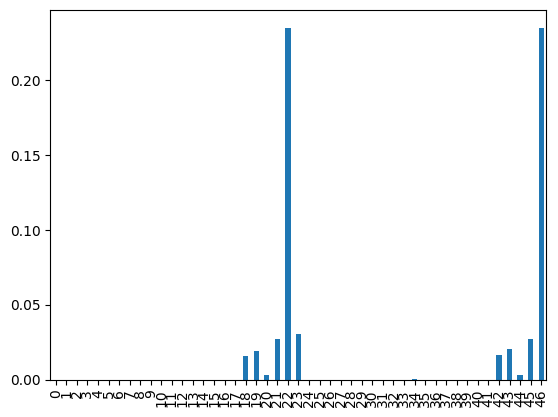

In [ ]:
pvalues.plot.bar()

APPLYING CHI-SQUARE ALGORITHM

Create an SelectKBest object to select features with two best ANOVA F-Values

In [ ]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
chi2_features = SelectKBest(chi2, k = 8)
fit=chi2_features.fit(X,Y)
fit.scores_

array([2.16889461e+05, 2.16924574e+05, 2.16616720e+05, 3.80090744e+05,
       3.81516976e+05, 3.78766813e+05, 4.13189140e+04, 9.01018346e+04,
       2.13942325e+05, 2.26646901e+04, 9.96375441e+03, 4.12072836e+04,
       2.81647471e+01, 2.81410036e+01, 2.79616262e+01, 2.22482078e+01,
       2.23526383e+01, 2.21753999e+01, 1.48142701e-01, 1.22211144e-01,
       1.96418810e-01, 1.54526983e-04, 1.66627549e-05, 2.63077409e-04,
       1.05944735e+03, 1.05862208e+03, 1.05718229e+03, 1.40577621e+03,
       1.41121030e+03, 1.40078835e+03, 1.74699206e+02, 3.60779231e+02,
       8.53076339e+02, 8.99985593e+01, 3.95248972e+01, 1.62804208e+02,
       4.94886640e-01, 4.78678739e-01, 4.77887669e-01, 1.37038053e+01,
       1.37607033e+01, 1.36506771e+01, 5.92384945e-03, 3.73216656e-03,
       1.35995398e-02, 7.83658539e-05, 1.11359306e-05])

In [ ]:
X_Kbest_features=chi2_features.fit_transform(X_train ,Y_train)# selecting top 8 features


In [ ]:
print(X_Kbest_features)

[[ 1056  1056  1056 ... 28548     0     0]
 [ 1130  1130  1131 ... 28964     0     0]
 [ 1335  1335  1335 ... 27417     0     0]
 ...
 [ 1321  1321  1321 ... 20267     0     0]
 [ 2050  2050  2053 ... 29561     0     0]
 [ 2173  2173  2173 ... 33828     0     0]]


In [ ]:
X_Kbest_features.shape

(3488, 8)

In [ ]:

print('Original feature number:', X_train.shape)
print('Reduced feature number:', X_Kbest_features.shape)

Original feature number: (3488, 47)
Reduced feature number: (3488, 8)


In [ ]:
X_Kbest_features=chi2_features.fit_transform(X_test ,Y_test)
print('Original feature number:', X_test.shape[1])
print('Reduced feature number:', X_Kbest_features.shape[1])

Original feature number: 47
Reduced feature number: 8


CLASSIFICATION USING SUPPORT VECTOR MACHINE ALGORITHM

In [ ]:
from sklearn.preprocessing import StandardScaler
st_x= StandardScaler()
X_train= st_x.fit_transform(X_train)
X_test= st_x.transform(X_test)

BUILDING AND TRAINING OUR MODEL


In [ ]:
from sklearn.svm import SVC # "Support vector classifier"
classifier = SVC(kernel='linear', random_state=123)
classifier.fit(X_train, Y_train)

SVC(kernel='linear', random_state=123)

MAKING PREDICTIONS WITH OUR DATA

In [ ]:
y_pred= classifier.predict(X_test)

MAKING CONFUSION MATRIX


In [ ]:
#Creating the Confusion matrix
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(Y_test, y_pred)
print(cm)

[[1133  469]
 [ 123 1763]]


THIS INDICATES HOW MANY UNIQUE ITEMS ARE THERE IN OUR DATASET


In [ ]:
Y_train.unique()

array([1, 0])

GETTING DATAFEAME LEVELS


In [ ]:
from sklearn .utils.multiclass import unique_labels
unique_labels(Y_test)

array([0, 1])

COMBINE THESE LABELS WITH CONFUSION MATRIX

In [ ]:
def plot(y_true,y_pred):
  labels=unique_labels(Y_test)
  column=[f'predicted{label}' for label in labels]
  indices=[f'actual{label}' for label in labels]
  table= pd.DataFrame(confusion_matrix(y_true,y_pred),columns=column,index=indices)
  return table

In [ ]:
 plot(Y_test,y_pred)

,predicted0,predicted1
actual0,1133,469
actual1,123,1763


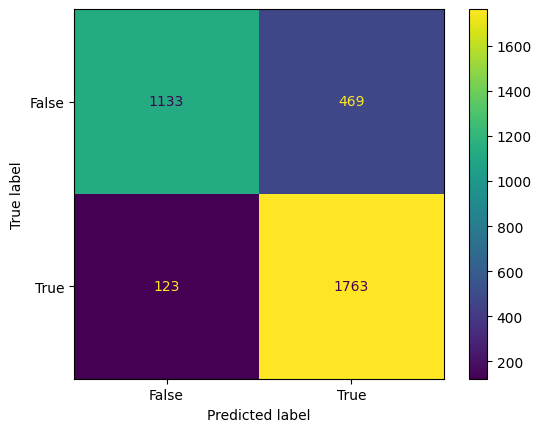

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics



confusion_matrix = metrics.confusion_matrix(Y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

CALCULATING ACCURACY PRECISION AND RECALL VALUE:

In [ ]:
from sklearn.metrics import precision_score
precisionscore = precision_score(Y_test, y_pred, pos_label=1,average='micro')
print("precision_score", precisionscore)

from sklearn.metrics import recall_score
recallscore = recall_score(Y_test, y_pred, pos_label=1,average='micro')
print("recall_score",recallscore)

from sklearn.metrics import f1_score
f1score= f1_score(Y_test, y_pred, pos_label=1,average='micro')
print("f1_score",f1score)


precision_score 0.8302752293577982
recall_score 0.8302752293577982
f1_score 0.8302752293577982


In [ ]:
from sklearn.metrics import classification_report
report = classification_report(Y_test, y_pred,zero_division=0)
print(report)

              precision    recall  f1-score   support

           0       0.90      0.71      0.79      1602
           1       0.79      0.93      0.86      1886

    accuracy                           0.83      3488
   macro avg       0.85      0.82      0.82      3488
weighted avg       0.84      0.83      0.83      3488



APPLYING KNN CLASSIFICATION ALGORITHM

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )
classifier.fit(X_train, Y_train)

KNeighborsClassifier()

In [ ]:
y_pred= classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(Y_test, y_pred)
print(cm)

[[1347  255]
 [  96 1790]]


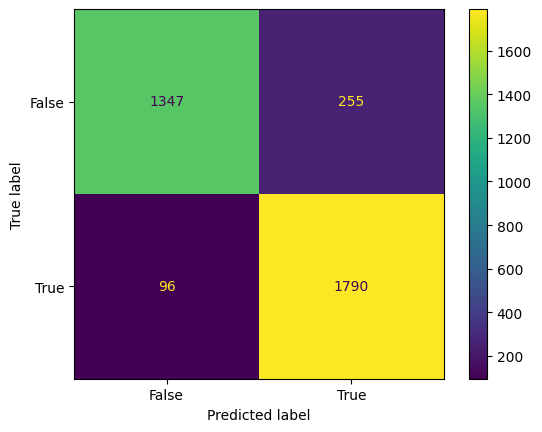

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics



confusion_matrix = metrics.confusion_matrix(Y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
from sklearn.metrics import precision_score
precisionscore = precision_score(Y_test, y_pred, pos_label=1,average='micro')
print("precision_score", precisionscore)

from sklearn.metrics import recall_score
recallscore = recall_score(Y_test, y_pred, pos_label=1,average='micro')
print("recall_score",recallscore)

from sklearn.metrics import f1_score
f1score= f1_score(Y_test, y_pred, pos_label=1,average='micro')
print("f1_score",f1score)

precision_score 0.8993692660550459
recall_score 0.8993692660550459
f1_score 0.8993692660550459


In [ ]:
from sklearn.metrics import classification_report
report = classification_report(Y_test, y_pred,zero_division=0)
print(report)

              precision    recall  f1-score   support

           0       0.93      0.84      0.88      1602
           1       0.88      0.95      0.91      1886

    accuracy                           0.90      3488
   macro avg       0.90      0.89      0.90      3488
weighted avg       0.90      0.90      0.90      3488



APPLYING LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier= LogisticRegression(random_state=123,solver='lbfgs', max_iter=1000)
classifier.fit(X_train, Y_train)

LogisticRegression(max_iter=1000, random_state=123)

In [ ]:
y_pred= classifier.predict(X_test)

In [ ]:
 from sklearn.metrics import confusion_matrix
 cm= confusion_matrix(Y_test, y_pred)
 print(cm)

[[1173  429]
 [ 164 1722]]


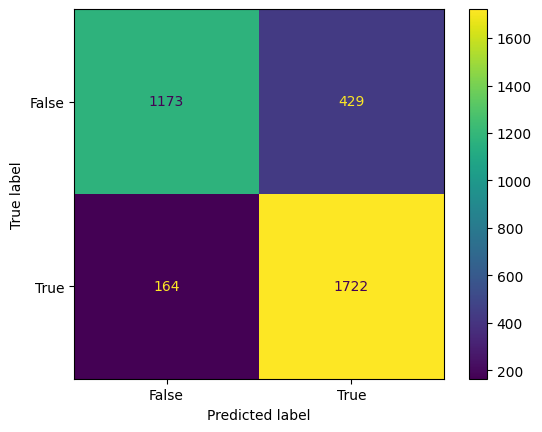

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics



confusion_matrix = metrics.confusion_matrix(Y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
from sklearn.metrics import precision_score
precisionscore = precision_score(Y_test, y_pred, pos_label=1,average='micro')
print("precision_score", precisionscore)

from sklearn.metrics import recall_score
recallscore = recall_score(Y_test, y_pred, pos_label=1,average='micro')
print("recall_score",recallscore)

from sklearn.metrics import f1_score
f1score= f1_score(Y_test, y_pred, pos_label=1,average='micro')
print("f1_score",f1score)

precision_score 0.8299885321100917
recall_score 0.8299885321100917
f1_score 0.8299885321100917


In [ ]:
from sklearn.metrics import classification_report
report = classification_report(Y_test, y_pred,zero_division=0)
print(report)

              precision    recall  f1-score   support

           0       0.88      0.73      0.80      1602
           1       0.80      0.91      0.85      1886

    accuracy                           0.83      3488
   macro avg       0.84      0.82      0.83      3488
weighted avg       0.84      0.83      0.83      3488



APPLYING RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier= RandomForestClassifier(n_estimators= 12, criterion="entropy")
classifier.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=12)

In [ ]:
y_pred= classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(Y_test, y_pred)
print(cm)

[[1595    7]
 [   7 1879]]


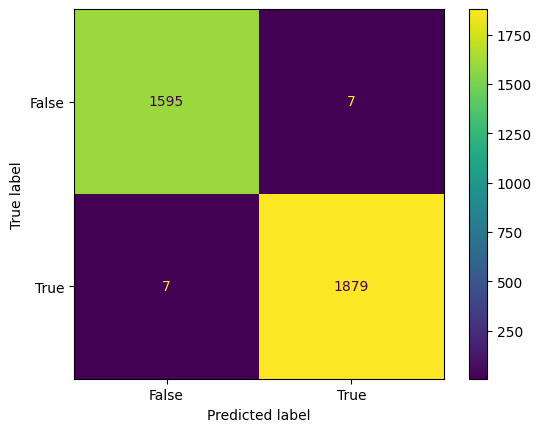

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics



confusion_matrix = metrics.confusion_matrix(Y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
from sklearn.metrics import precision_score
precisionscore = precision_score(Y_test, y_pred, pos_label=1,average='micro')
print("precision_score", precisionscore)

from sklearn.metrics import recall_score
recallscore = recall_score(Y_test, y_pred, pos_label=1,average='micro')
print("recall_score",recallscore)

from sklearn.metrics import f1_score
f1score= f1_score(Y_test, y_pred, pos_label=1,average='micro')
print("f1_score",f1score)

precision_score 0.9936926605504587
recall_score 0.9936926605504587
f1_score 0.9936926605504587


In [ ]:
from sklearn.metrics import classification_report
report = classification_report(Y_test, y_pred,zero_division=0)
print(report)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1602
           1       1.00      0.99      0.99      1886

    accuracy                           0.99      3488
   macro avg       0.99      0.99      0.99      3488
weighted avg       0.99      0.99      0.99      3488



APPLYING ADABOOST ALGORITHM

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(X_train, Y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(Y_test, y_pred)
print(cm)

[[1308  294]
 [ 211 1675]]


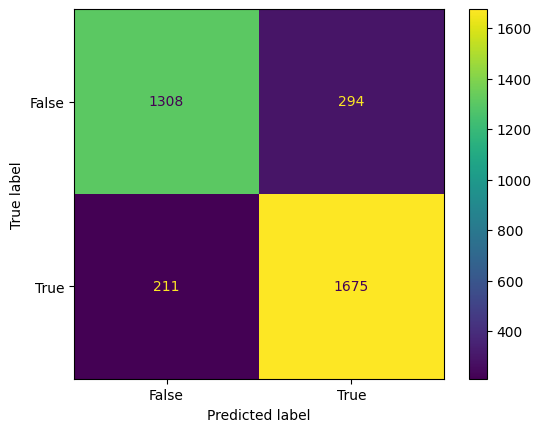

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics



confusion_matrix = metrics.confusion_matrix(Y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:


from sklearn.metrics import accuracy_score
accuracy_score(Y_test, y_pred)

from sklearn.metrics import precision_score
precisionscore = precision_score(Y_test, y_pred, pos_label=1,average='micro')
print("precision_score", precisionscore)

from sklearn.metrics import recall_score
recallscore = recall_score(Y_test, y_pred, pos_label=1,average='micro')
print("recall_score",recallscore)

from sklearn.metrics import f1_score
f1score= f1_score(Y_test, y_pred, pos_label=1,average='micro')
print("f1_score",f1score)

precision_score 0.8552178899082569
recall_score 0.8552178899082569
f1_score 0.8552178899082569


In [ ]:
from sklearn.metrics import classification_report
report = classification_report(Y_test, y_pred,zero_division=0)
print(report)

              precision    recall  f1-score   support

           0       0.86      0.82      0.84      1602
           1       0.85      0.89      0.87      1886

    accuracy                           0.86      3488
   macro avg       0.86      0.85      0.85      3488
weighted avg       0.86      0.86      0.85      3488



COMPARISON OF PERFORMANCE METRICS OF DIFFERENT CLASSIFIERS

1. ACCURACY

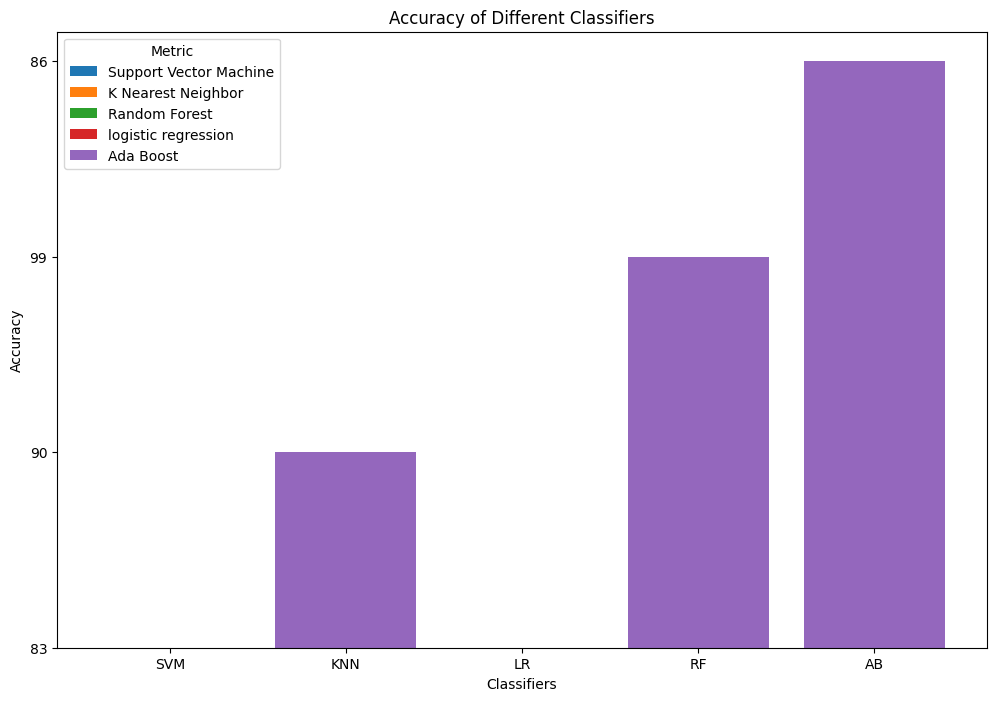

In [ ]:
X = np.array(['SVM', 'KNN', 'LR', 'RF', 'AB'])
Y = np.array(['83','90','83','99','86'])
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))




plt.bar(X, Y, label ='Support Vector Machine')
plt.bar(X, Y, label ='K Nearest Neighbor')
plt.bar(X, Y, label ='Random Forest')
plt.bar(X, Y, label ='logistic regression')
plt.bar(X, Y, label ='Ada Boost')
#plt.bar(X, Y)
plt.ylabel("Accuracy")
plt.xlabel("Classifiers")
plt.legend(title='Metric')
plt.title("Accuracy of Different Classifiers")


plt.show()

2. PRECISION

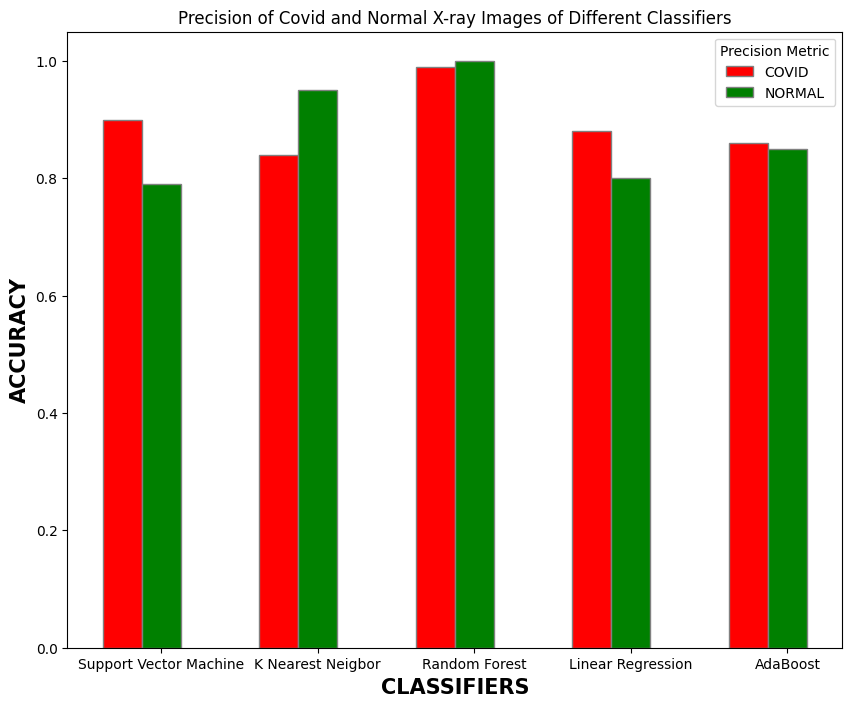

In [ ]:
barWidth = 0.25
fig = plt.subplots(figsize =(10, 8))

# set height of bar
COVID =np.array([0.90, 0.84, 0.99,0.88,0.86])
NORMAL = np.array([0.79, 0.95, 1.0,0.80,0.85])




# Set position of bar on X axis
br1 = np.arange(len(COVID))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]


# Make the plot
plt.bar(br1, COVID, color ='r', width = barWidth,
        edgecolor ='grey', label ='COVID')
plt.bar(br2, NORMAL, color ='g', width = barWidth,
        edgecolor ='grey', label ='NORMAL')




# Adding Xticks
plt.xlabel('CLASSIFIERS', fontweight ='bold', fontsize = 15)
plt.ylabel('ACCURACY', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(COVID))],
        ['Support Vector Machine', 'K Nearest Neigbor','Random Forest','Linear Regression','AdaBoost'])


plt.title("Precision of Covid and Normal X-ray Images of Different Classifiers")


plt.legend( title='Precision Metric')
plt.show()

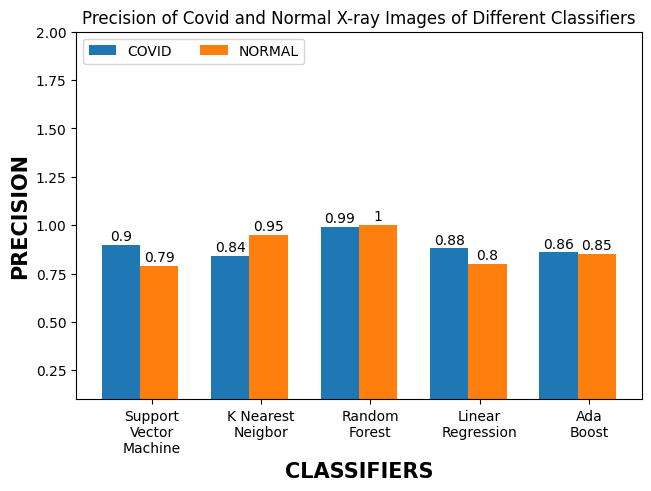

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
X=('Support\nVector\nMachine', 'K Nearest\nNeigbor','Random\nForest','Linear\nRegression','Ada\nBoost')
Y = {
    'COVID': (0.90, 0.84, 0.99,0.88,0.86),
    'NORMAL': (0.79, 0.95, 1.0,0.80,0.85),

}
x = np.arange(len(X))  # the label locations
width = 0.35  # the width of the bars
multiplier = 0.2

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in Y.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=1)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('PRECISION',fontweight ='bold', fontsize = 15)
ax.set_xlabel('CLASSIFIERS',fontweight ='bold', fontsize = 15)
ax.set_title("Precision of Covid and Normal X-ray Images of Different Classifiers")
ax.set_xticks(x + width, X)
ax.legend(loc='upper left', ncols=2)
ax.set_ylim(0.1, 2.0)
#ax.set_ylim(0, 100)
plt.show()

3. RECALL

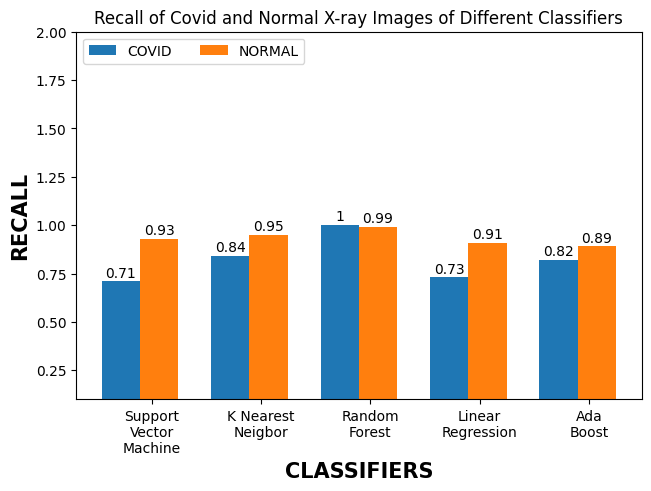

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
X=('Support\nVector\nMachine', 'K Nearest\nNeigbor','Random\nForest','Linear\nRegression','Ada\nBoost')
Y = {
    'COVID': (0.71, 0.84, 1.0,0.73,0.82),
    'NORMAL': (0.93, 0.95, 0.99,0.91,0.89),

}
x = np.arange(len(X))  # the label locations
width = 0.35  # the width of the bars
multiplier = 0.2

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in Y.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=1)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('RECALL',fontweight ='bold', fontsize = 15)
ax.set_xlabel('CLASSIFIERS',fontweight ='bold', fontsize = 15)
ax.set_title("Recall of Covid and Normal X-ray Images of Different Classifiers")
ax.set_xticks(x + width, X)
ax.legend(loc='upper left', ncols=2)
ax.set_ylim(0.1, 2.0)
#ax.set_ylim(0, 100)
plt.show()

4. F-SCORE

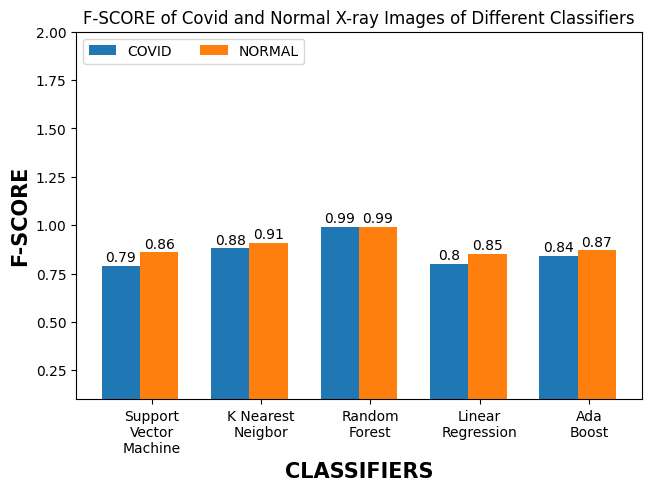

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
X=('Support\nVector\nMachine', 'K Nearest\nNeigbor','Random\nForest','Linear\nRegression','Ada\nBoost')
Y = {
    'COVID': (0.79, 0.88, 0.99,0.80,0.84),
    'NORMAL': (0.86, 0.91, 0.99,0.85,0.87),

}
x = np.arange(len(X))  # the label locations
width = 0.35  # the width of the bars
multiplier = 0.2

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in Y.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=1)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('F-SCORE',fontweight ='bold', fontsize = 15)
ax.set_xlabel('CLASSIFIERS',fontweight ='bold', fontsize = 15)
ax.set_title("F-SCORE of Covid and Normal X-ray Images of Different Classifiers")
ax.set_xticks(x + width, X)
ax.legend(loc='upper left', ncols=2)
ax.set_ylim(0.1, 2.0)
#ax.set_ylim(0, 100)
plt.show()